In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
from factor_analyzer import FactorAnalyzer
from sklearn import preprocessing

In [2]:
datafile = u'D:\\机器学习\\论文\\数据\\tzz1.xlsx'
data = pd.read_excel(datafile)
scaler =preprocessing. MinMaxScaler( )
scaler.fit(data)
scaler.data_max_
#标准化到0与1之间
data_normorlize=scaler.transform(data)

In [3]:
#充分性测试Bartlett's Test，Kaiser-Meyer-Olkin Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_normorlize)
chi_square_value, p_value
#p-value=0, 表明观察到的相关矩阵不是一个单位阵，拒绝各变量独立的假设，即变量间有较强相关

(414.78900974594353, 8.880876000337959e-48)

In [4]:
#KMO检验，检查变量间的偏相关性，KMO值越接近于1，变量间的偏相关性就越强，因子分析效果就好。一般以0.6比较
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_normorlize)
print(kmo_model)

0.6606868684147108


D:\anaconda\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [5]:
import seaborn as sns
sns.pairplot(data)

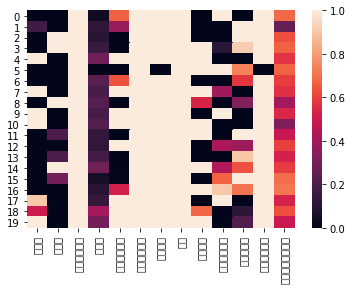

In [6]:
sns.heatmap(data,vmin=0, vmax=1)

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from factor_analyzer import FactorAnalyzer

datafile = u'D:\\机器学习\\论文\\数据\\tzz1.xlsx'
data = pd.read_excel(datafile)

# 数据均值规范化
data1 = data.iloc[:,1:]  
data2 = preprocessing.scale(data1)
# 相关系数矩阵、特征值
c = np.corrcoef(data2)
np.linalg.eigvals(c)

# 确定公共因子个数，以解释度达到80%为标准
fa = FactorAnalyzer(7,rotation=None)  #固定公共因子个数为11个
fa.fit(data2) 
var = fa.get_factor_variance()#给出贡献率
print("\n解释的总方差（即贡献率）:\n", var)



解释的总方差（即贡献率）:
 (array([6.28749164, 2.18681016, 1.25905375, 0.67725626, 0.35371927,
       0.22095882, 0.07053526]), array([0.52395764, 0.18223418, 0.10492115, 0.05643802, 0.02947661,
       0.01841324, 0.00587794]), array([0.52395764, 0.70619182, 0.81111296, 0.86755098, 0.89702759,
       0.91544083, 0.92131876]))


In [8]:
var 

(array([6.28749164, 2.18681016, 1.25905375, 0.67725626, 0.35371927,
        0.22095882, 0.07053526]),
 array([0.52395764, 0.18223418, 0.10492115, 0.05643802, 0.02947661,
        0.01841324, 0.00587794]),
 array([0.52395764, 0.70619182, 0.81111296, 0.86755098, 0.89702759,
        0.91544083, 0.92131876]))

In [9]:
# 初始因子载荷矩阵
fa.loadings_  #成分矩阵

# 因子旋转、旋转后因子载荷矩阵
fa1 = FactorAnalyzer(7,rotation='varimax')  
fa1.fit(data2) 
fa1.loadings_

# 因子得分矩阵
a = fa1.transform(data2)

In [10]:
a=np.round(a,2)
a

array([[-1.63,  0.11,  1.18,  1.03,  0.15, -0.45, -1.4 ],
       [-0.63,  0.45, -2.98, -2.21, -0.06, -0.14, -0.13],
       [-0.12, -1.58, -0.33,  0.82, -1.16, -1.43, -0.25],
       [ 0.27, -1.53, -0.37,  0.78,  1.06, -0.49,  1.84],
       [ 0.87,  1.21,  0.25,  0.11,  0.29,  0.38,  0.45],
       [-2.19, -0.22,  0.14,  0.58,  1.13, -1.29, -1.45],
       [ 0.77,  0.19, -0.03,  0.25, -1.01, -0.99,  0.42],
       [-0.28,  0.79,  0.75, -0.5 ,  0.73,  0.9 , -0.28],
       [ 0.47, -1.71,  1.5 , -2.21, -0.28,  0.81,  1.02],
       [ 0.  ,  1.08,  0.67, -0.38, -0.99,  2.34,  1.05],
       [ 0.02,  0.61,  1.22, -1.49,  0.5 , -1.63,  0.74],
       [-0.16, -0.46, -1.12, -0.41,  0.59,  0.29, -0.93],
       [-0.64,  0.35,  0.39,  0.46, -0.67, -0.41,  2.22],
       [ 0.46, -0.44, -0.04, -0.28, -1.11, -0.06, -1.56],
       [ 1.42, -2.15, -0.01,  0.75,  0.76,  1.08, -1.4 ],
       [-0.75,  0.15, -0.98,  0.53, -2.12,  0.92,  0.86],
       [-0.55,  0.33, -0.74,  0.91,  0.57,  1.31,  1.31],
       [-0.77,

In [11]:
a.T

array([[-1.63, -0.63, -0.12,  0.27,  0.87, -2.19,  0.77, -0.28,  0.47,
         0.  ,  0.02, -0.16, -0.64,  0.46,  1.42, -0.75, -0.55, -0.77,
         2.11,  1.34],
       [ 0.11,  0.45, -1.58, -1.53,  1.21, -0.22,  0.19,  0.79, -1.71,
         1.08,  0.61, -0.46,  0.35, -0.44, -2.15,  0.15,  0.33,  0.53,
         1.43,  0.87],
       [ 1.18, -2.98, -0.33, -0.37,  0.25,  0.14, -0.03,  0.75,  1.5 ,
         0.67,  1.22, -1.12,  0.39, -0.04, -0.01, -0.98, -0.74,  0.99,
        -0.1 , -0.4 ],
       [ 1.03, -2.21,  0.82,  0.78,  0.11,  0.58,  0.25, -0.5 , -2.21,
        -0.38, -1.49, -0.41,  0.46, -0.28,  0.75,  0.53,  0.91,  0.22,
         0.74,  0.32],
       [ 0.15, -0.06, -1.16,  1.06,  0.29,  1.13, -1.01,  0.73, -0.28,
        -0.99,  0.5 ,  0.59, -0.67, -1.11,  0.76, -2.12,  0.57,  0.45,
        -0.06,  1.23],
       [-0.45, -0.14, -1.43, -0.49,  0.38, -1.29, -0.99,  0.9 ,  0.81,
         2.34, -1.63,  0.29, -0.41, -0.06,  1.08,  0.92,  1.31,  0.28,
        -1.35, -0.07],
       [-1